should use the pie chart only if there are two labels like for eg: true or false and if more that that than we should prefer using bar chart

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

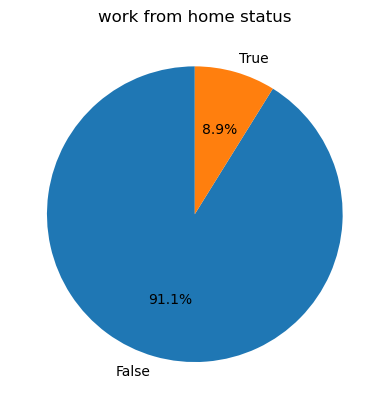

In [32]:
df_jwfh_pie = df.job_work_from_home.value_counts()
df_jwfh_pie.plot(kind='pie',startangle=90,autopct='%1.1f%%') # for one do %1.1f or for two decimal use %1.2f
plt.title('work from home status')
plt.ylabel("")
plt.show()

In [36]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


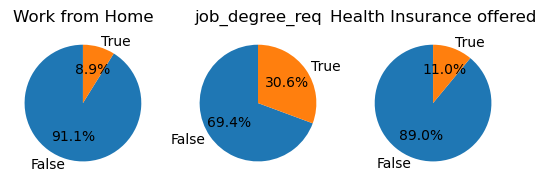

In [59]:
fig, ax = plt.subplots(1,3)

dict_columns = {
        'job_work_from_home':'Work from Home',
        'job_no_degree_mention': 'job_degree_req',
        'job_health_insurance': 'Health Insurance offered'

}
for i, (column,title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts(),startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)

plt.show()

# Scatter Plot

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [12]:
df_exploded = df.explode('job_skills')

skills_stats = df_exploded.groupby('job_skills').agg(
    skills_count = ('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

skills_stats = skills_stats.sort_values(by='skills_count', ascending=False).head(10)

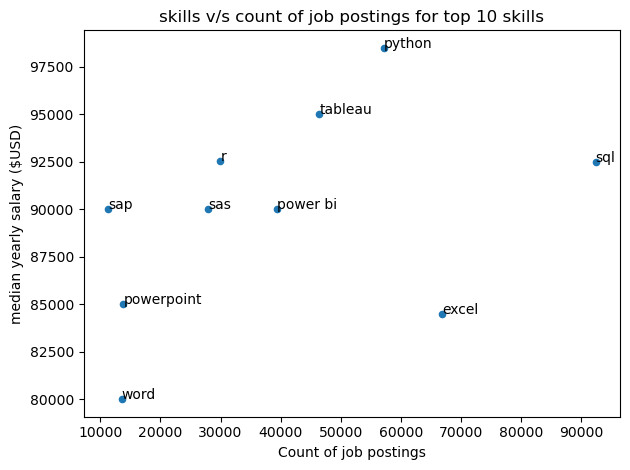

In [24]:
skills_stats.plot(kind='scatter', x='skills_count', y='median_salary')
plt.title('skills v/s count of job postings for top 10 skills')
plt.xlabel("Count of job postings")
plt.ylabel('median yearly salary ($USD)')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats.skills_count.iloc[i], skills_stats.median_salary.iloc[i], txt)

plt.show()